The goal of this program is to design a robot and write a control policy to move the robot to the desired point and a desired orientation

In [1]:
%pylab inline
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
import math

Populating the interactive namespace from numpy and matplotlib


## Euler Integration

In [2]:
def simulate(Δt,z,u):
    z = z + Δt*u
    return z

## Control Policy

In [3]:
def control(t,z,pos_ref,kp_kd,l,g,mass,dz):
    error = pos_ref - z
    xu = kp_kd[0]*error[0] + kp_kd[1]*error[3] + mass*g
    zu = kp_kd[0]*error[1] + kp_kd[1]*error[4] + mass*g
    thetaU = kp_kd[0]*error[2] + kp_kd[1]*error[5] + (6*g)/l
    
    dz[:3] = z[3:]
    dz[3] = xu/mass-g 
    dz[4] = zu/mass-g
    dz[5] = thetaU/mass-g
    return dz

## Vehicle Design

[[-0.99608784 -0.44807362  0.52532199]
 [ 0.08836869  0.89399666  0.85090352]
 [-0.5864126  -3.62765091 -3.1409531 ]]
The rank of the matrix is:  3


NameError: name 'patches' is not defined

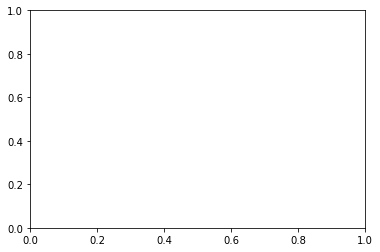

In [4]:
p1 = np.array([1,0.5])
p2 = np.array([2.5,0.5])
p3 = np.array([4,0.5])
theta1 = 135
theta2 = 90
theta3 = 45

A = np.array([[math.cos(theta1),math.cos(theta2),math.cos(theta3)],[math.sin(theta1),math.sin(theta2),math.sin(theta3)],[math.cos(theta1)*p1[1]-math.sin(theta1)*p1[0],math.cos(theta2)*p2[1]-math.sin(theta3)*p3[0],math.cos(theta3)*p3[1]-math.sin(theta3)*p3[0]]])
print(A)
rank = np.linalg.matrix_rank(A)
print("The rank of the matrix is: ",rank)


fig, ax = plt.subplots()

x_pos = [0.5, 2.5,4.5]
y_pos = [1,1,1]
x_direct = [-1,0,1]
y_direct = [1,1,1]


rect = patches.Rectangle((0, 0), 5, 1, facecolor='none',linewidth=1, edgecolor='r', ls='--')

ax.quiver(x_pos,y_pos,x_direct,y_direct)
ax.add_patch(rect)
plt.grid()
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 20)
plt.show()

## Running the simulator

In [ ]:
tf=10
Δt = 0.1  #Time Step
time = np.linspace(0.,tf,int(tf/Δt+1))

#initializations
z = np.array([0.,0.,0.,0.,0.,0.])
z_log = [np.copy(z)]
dz = np.array([0.,0.,0.,0.,0.,0.])
theta_ref = (3*math.pi)/4
pos_ref = np.array([15,15,theta_ref,0,0,0])
l=2.5
g = 9.8
mass = 1
kp_kd = np.array([5.,3.])

for t in time[1:]:
    contrl = control(t,z,pos_ref,kp_kd,l,g,mass,dz)
    z = simulate(Δt,z,contrl)
    z_log.append(np.copy(z))
z_log = np.array(z_log)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(time,z_log[:,1], 'r--')

#print(z_log)
pos_x = z_log[:,0]
print(pos_x.shape)
pos_y = z_log[:,1]
pos_theta = z_log[:,2]

## Animation

In [ ]:
patch = patches.Rectangle((0,0),0,0,fc='b')

def init():
    ax.add_patch(patch)
    return patch,



def animate(i):
    patch.set_width(5)
    patch.set_height(1)
    patch.set_xy([pos_x[i],pos_y[i]])
    #patch.set_xy([0,0])
    patch.angle = np.rad2deg(pos_theta[i])
    return patch,

anim = animation.FuncAnimation(fig, animate,init_func=init,frames=len(time),interval=150,blit=True)
HTML(anim.to_jshtml())